In [63]:
import numpy as np
import matplotlib.pyplot as plt

In [252]:
x = np.linspace(0,1,100)
y1 = x
y2 = x**2
y3 = np.sqrt(x)

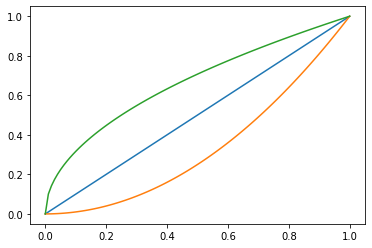

In [253]:
plt.plot(x,y1,x,y2,x,y3)

In [278]:
def randomPerturbation(length, n=1):
    shape = (length-1,)
    amp = (np.random.default_rng().random(shape[0]-1)*2-1)/(np.arange(1,shape[0])**n)
    fft = np.append([0],1j*amp)
    return np.fft.irfft(fft,2*length-2)[0:length]

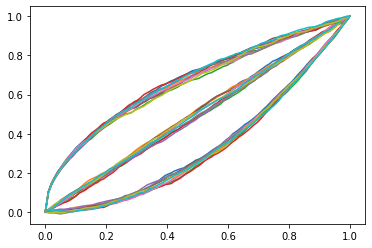

In [302]:
plt.plot(x,(y1+[2*randomPerturbation(x.size,1) for _ in range(10)]).T,
         x,(y2+[2*randomPerturbation(x.size,1) for _ in range(10)]).T,
         x,(y3+[2*randomPerturbation(x.size,1) for _ in range(10)]).T);

In [234]:
def pathlength(x,y):
    dx = np.diff(x)
    dy = np.diff(y)
    return np.sum(np.sqrt(dx**2 + dy**2))

In [303]:
p1 = [pathlength(x,y1 + 2*randomPerturbation(x.size,1)) for _ in range(1000)]
p2 = [pathlength(x,y2 + 2*randomPerturbation(x.size,1)) for _ in range(1000)]
p3 = [pathlength(x,y3 + 2*randomPerturbation(x.size,1)) for _ in range(1000)]

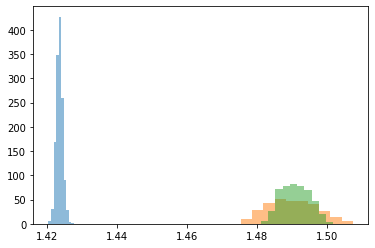

In [304]:
plt.hist(p1,density=True,alpha=0.5)
plt.hist(p2,density=True,alpha=0.5)
plt.hist(p3,density=True,alpha=0.5);